<a href="https://colab.research.google.com/github/christinabrnn/Python-Study/blob/main/Neural%20Network/4_1_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Extreme Overfitting Example**

I'm going to simulate a set of random images and their associated labels. I want you to then fit a neural network to the random data. Finally, report how accurate the model is on the training data, and visualize training accuracy across epochs.

Descriptive statistics for the training data:
                  0
count  3.920000e+06
mean   5.001389e-01
std    2.887706e-01
min    4.634925e-07
25%    2.500172e-01
50%    5.000589e-01
75%    7.502460e-01
max    9.999999e-01

The first ten labels are [3. 8. 4. 0. 4. 5. 1. 5. 3. 8.]



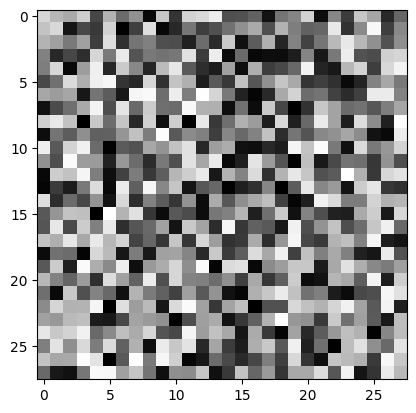

(5000, 784)
(5000, 1)


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from PIL import Image as im

# Let's synthesize 20,000 images comprised of random pixel values.
train_images_random = np.random.random((5000, 28,28))
df = pd.DataFrame(train_images_random.reshape(-1)) #-1 is a wildcard; it'll guess what shape I want, and by default give a vector back.
print(f'Descriptive statistics for the training data:\n{df.describe()}\n')

# And let's make-up labels for them.
train_labels_random = np.floor(np.random.random(5000)*10)
print(f'The first ten labels are {train_labels_random[:10]}\n')

# Here's what the first picture looks like.
plt.imshow(train_images_random[0],cmap=plt.cm.binary)
plt.show()

# Let's first convert each pixel matrix into a vector.
train_images_random = train_images_random.reshape(5000,28*28)
train_labels_random = train_labels_random.reshape(5000,1)
print(train_images_random.shape)
print(train_labels_random.shape)

Now we will use the simulated data and fit a sequential Keras model that has 512 units in the first layer, with a Relu activation, and then the output layer.

In [6]:
# Setup your model topology here using the Sequential API.

model = keras.Sequential([
      layers.Dense(units=512,activation="relu"),
      layers.Dense(units=1, activation="softmax")
])

# Compile the model
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])


# Train the model
history = model.fit(train_images_random,train_labels_random,epochs=50,batch_size=20,validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (20, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0890 - loss: -3627.7771 - mae: 3.7434 - mse: 20.5803 - val_accuracy: 0.0880 - val_loss: -21853.7285 - val_mae: 3.7410 - val_mse: 20.6250
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0788 - loss: -33140.5156 - mae: 3.8104 - mse: 21.1606 - val_accuracy: 0.0880 - val_loss: -72672.2031 - val_mae: 3.7410 - val_mse: 20.6250
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0798 - loss: -92636.0391 - mae: 3.8422 - mse: 21.3122 - val_accuracy: 0.0880 - val_loss: -151323.5938 - val_mae: 3.7410 - val_mse: 20.6250
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0874 - loss: -179269.9375 - mae: 3.8065 - mse: 21.1247 - val_accuracy: 0.0880 - val_loss: -258631.9375 - val_mae: 3.7410 - val_mse: 20.6250
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0818 - loss: -300191.2188 - mae: 3.8778 - mse: 21.7526 - val_accuracy: 0.0880 - val_loss: -392537.2188 - val_mae: 3.7410 - val_

Okay, plot the training loss now...

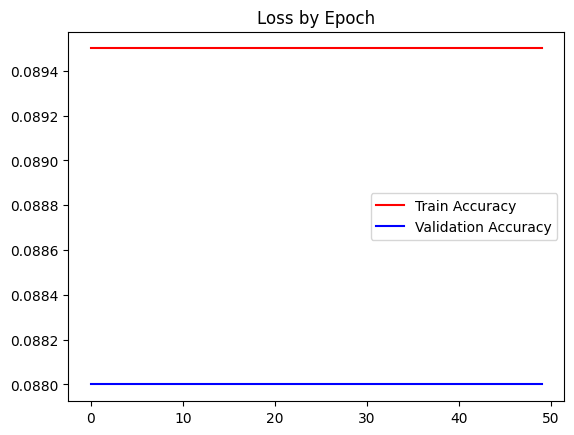

In [7]:
# Call plot commands here.

plt.plot(history.history['accuracy'],c="r")
plt.plot(history.history['val_accuracy'],c="b")
plt.legend(['Train Accuracy','Validation Accuracy'])
plt.title("Loss by Epoch")
plt.show()